In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train-data/train.csv


# Data Analysis | Data Handling | Data Vasualization | Mixed Data Handle 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('/kaggle/input/train-data/train.csv')[['Age', 'Fare', 'Cabin', 'Sex', 'Ticket', 'Survived']]

In [4]:
df.head()

,Age,Fare,Cabin,Sex,Ticket,Survived
0,22.0,7.2500,NaN,male,A/5 21171,0
1,38.0,71.2833,C85,female,PC 17599,1
2,26.0,7.9250,NaN,female,STON/O2. 3101282,1
3,35.0,53.1000,C123,female,113803,1
4,35.0,8.0500,NaN,male,373450,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   Cabin     204 non-null    object 
 3   Sex       891 non-null    object 
 4   Ticket    891 non-null    object 
 5   Survived  891 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 41.9+ KB


In [6]:
df.describe()

,Age,Fare,Survived
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,0.383838
std,14.526497,49.693429,0.486592
min,0.420000,0.000000,0.000000
25%,20.125000,7.910400,0.000000
50%,28.000000,14.454200,0.000000
75%,38.000000,31.000000,1.000000
max,80.000000,512.329200,1.000000


In [7]:
df[df.duplicated()]

,Age,Fare,Cabin,Sex,Ticket,Survived
120,21.00,73.5000,NaN,male,S.O.C. 14879,0
201,NaN,69.5500,NaN,male,CA. 2343,0
324,NaN,69.5500,NaN,male,CA. 2343,0
409,NaN,25.4667,NaN,female,4133,0
413,NaN,0.0000,NaN,male,239853,0
466,NaN,0.0000,NaN,male,239853,0
485,NaN,25.4667,NaN,female,4133,0
612,NaN,15.5000,NaN,female,367230,1
641,24.00,69.3000,B35,female,PC 17477,1
644,0.75,19.2583,NaN,female,2666,1


In [8]:
df.drop_duplicates(inplace= True)

In [9]:
df.isna().sum()[df.isna().sum() > 0]

Age      164
Cabin    671
dtype: int64

In [10]:
#fillna Age missing columns

df['Age']= df['Age'].fillna(df['Age'].median())


# EDA Analysis

Survival Rate by AgeGroup
AgeGroup
Baby        0.697674
Child       0.424242
Teenager    0.403226
Adult       0.333333
OldAdult    0.418440
Old         0.227273
Name: Survived, dtype: float64




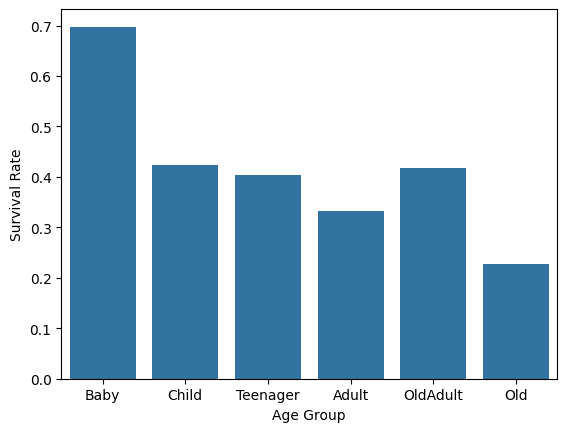

In [11]:
#Age group by ['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old']

df['AgeGroup']= pd.cut(df['Age'], bins= [0, 5, 14, 18, 30, 60, 100], 
                       labels= ['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'])

survival_by_agegroup= df.groupby('AgeGroup')['Survived'].mean()
print('Survival Rate by AgeGroup')
print(survival_by_agegroup)
print('\n')

sns.barplot(data= df, x= 'AgeGroup', y= 'Survived', ci= None, 
            order= ['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'])
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

14
Survival rate by FareClass:
FareClass
Very Low     0.000000
Low          0.256236
Moderate     0.452632
Medium       0.424419
High         0.683673
Very High    0.727273
Luxury       0.777778
Name: Survived, dtype: float64




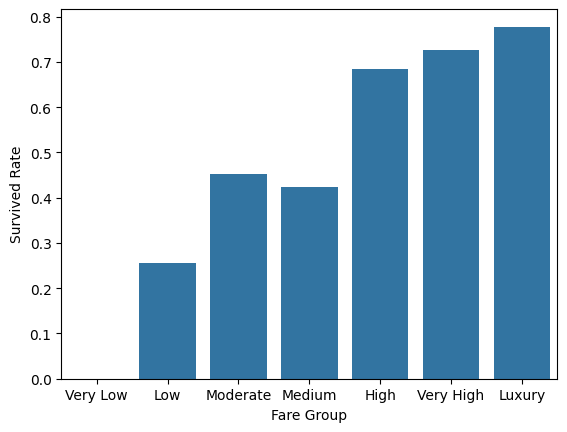

In [12]:
#Fare Class part by 'Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High', 'Luxury']

print((df['Fare'].values < 5).sum())

df['FareClass']= pd.cut(df['Fare'], bins= [0, 5, 15, 25, 50, 100, 250, float('inf')], 
                        labels= ['Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High', 'Luxury'])

survival_by_fareclass = df.groupby('FareClass')['Survived'].mean()
print("Survival rate by FareClass:")
print(survival_by_fareclass)
print("\n")

sns.barplot(x= 'FareClass', y= 'Survived', data= df, ci= None)
plt.xlabel('Fare Group')
plt.ylabel('Survived Rate')
plt.show()

In [13]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [14]:
#part by cabin columns with numerical and categorical

df['cabin_num']= df['Cabin'].str.extract('(\d+)')
df['cabin_cate']= df['Cabin'].str[0]

#drop the original column Cabin, why? The reason is part of the column 

df.drop(columns= 'Cabin')

#and fill the new, create 2 columns

df['cabin_num']= df['cabin_num'].fillna(-1)
df['cabin_cate']= df['cabin_cate'].fillna('Missing')

In [15]:
df.head()

,Age,Fare,Cabin,Sex,Ticket,Survived,AgeGroup,FareClass,cabin_num,cabin_cate
0,22.0,7.2500,NaN,male,A/5 21171,0,Adult,Low,-1,Missing
1,38.0,71.2833,C85,female,PC 17599,1,OldAdult,High,85,C
2,26.0,7.9250,NaN,female,STON/O2. 3101282,1,Adult,Low,-1,Missing
3,35.0,53.1000,C123,female,113803,1,OldAdult,High,123,C
4,35.0,8.0500,NaN,male,373450,0,OldAdult,Low,-1,Missing


In [16]:
#original Ticket columns are mixed data columns
# df['Ticket'].unique()

#part the numeric columns
df['ticket_num']= df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num']= pd.to_numeric(df['ticket_num'], errors= 'coerce', downcast= 'integer')

#part categorical columns
df['ticket_cat']= df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat']= np.where(df['ticket_cat'].str.isdigit(), np.nan, df['ticket_cat'] )

#missing value ticket_cat

df['ticket_cat']= df['ticket_cat'].fillna('missing')

#again extract ticket_cat mixed value

df['ticket_prefix'] = df['ticket_cat'].str.extract(r'^([A-Z./]+)')

#fill the missing value
df['ticket_prefix'] = df['ticket_prefix'].fillna('NUM')


#top 10 unique value 

freq = df['ticket_prefix'].value_counts()
rare = freq[freq < 10].index

df['ticket_prefix'] = df['ticket_prefix'].replace(rare, 'Other')

In [17]:
df= df.drop(columns= ['Fare','Ticket','ticket_cat'])

In [18]:
df.head()

,Age,Cabin,Sex,Survived,AgeGroup,FareClass,cabin_num,cabin_cate,ticket_num,ticket_prefix
0,22.0,NaN,male,0,Adult,Low,-1,Missing,21171.0,A/
1,38.0,C85,female,1,OldAdult,High,85,C,17599.0,PC
2,26.0,NaN,female,1,Adult,Low,-1,Missing,3101282.0,STON/O
3,35.0,C123,female,1,OldAdult,High,123,C,113803.0,NUM
4,35.0,NaN,male,0,OldAdult,Low,-1,Missing,373450.0,NUM
